# ❤️ Lovely Tensors

> After all, you are only human.

::: {.content-visible when-format="markdown"}
## [Read full docs](https://xl0.github.io/lovely-tensors) 
:::
::: {.content-visible when-format="html"}
<h3><a href="https://github.com/xl0/lovely-tensors">Source code</a></h3>
:::

### More lovely stuff
##### Working with numbers
- [Numpy](https://numpy.org/): ❤️ [Lovely NumPy](https://github.com/xl0/lovely-numpy)
- [JAX](https://jax.readthedocs.io/): 💘 [Lovely `JAX`](https://github.com/xl0/lovely-jax)
- [TinyGrad](https://github.com/tinygrad/tinygrad): 🫀 [Lovely Grad](https://github.com/xl0/lovely-grad)

##### Community
- [Discord](https://discord.gg/qBaqauUWXP)


## Install

```sh
pip install lovely-tensors
```
or
```sh
mamba install lovely-tensors
```
or
```sh
conda install -c conda-forge lovely-tensors
```

## How to use

In [ ]:
# |hide
import torch
from PIL import Image
from matplotlib import pyplot as plt, rcParams
from fastcore.test import test_eq

In [ ]:
# |hide
torch.set_printoptions(linewidth=120)

In [ ]:
# |hide
# Don't depend on torchvision
# numbers = VF.normalize(VF.center_crop(VF.to_tensor(Image.open("tenchman.jpg")), 196), **in_stats)
numbers = torch.load("mysteryman.pt", weights_only=True)
numbers1 = numbers

How often do you find yourself debugging PyTorch code? You dump a tensor to the cell output, and see this:

In [ ]:
# |hide
import lovely_tensors as lt

In [ ]:
# |hide
# A trick to make sure README.md shows the plain version.
lt.monkey_patch()
numbers = numbers.p

In [ ]:
numbers

tensor([[[-0.3541, -0.3369, -0.4054,  ..., -0.5596, -0.4739,  2.2489],
         [-0.4054, -0.4226, -0.4911,  ..., -0.9192, -0.8507,  2.1633],
         [-0.4739, -0.4739, -0.5424,  ..., -1.0390, -1.0390,  2.1975],
         ...,
         [-0.9020, -0.8335, -0.9363,  ..., -1.4672, -1.2959,  2.2318],
         [-0.8507, -0.7822, -0.9363,  ..., -1.6042, -1.5014,  2.1804],
         [-0.8335, -0.8164, -0.9705,  ..., -1.6555, -1.5528,  2.1119]],

        [[-0.1975, -0.1975, -0.3025,  ..., -0.4776, -0.3725,  2.4111],
         [-0.2500, -0.2325, -0.3375,  ..., -0.7052, -0.6702,  2.3585],
         [-0.3025, -0.2850, -0.3901,  ..., -0.7402, -0.8102,  2.3761],
         ...,
         [-0.4251, -0.2325, -0.3725,  ..., -1.0903, -1.0203,  2.4286],
         [-0.3901, -0.2325, -0.4251,  ..., -1.2304, -1.2304,  2.4111],
         [-0.4076, -0.2850, -0.4776,  ..., -1.2829, -1.2829,  2.3410]],

        [[-0.6715, -0.9853, -0.8807,  ..., -0.9678, -0.6890,  2.3960],
         [-0.7238, -1.0724, -0.9678,  ..., -1

In [ ]:
# | hide
numbers = numbers1

Was it really useful for you, as a human, to see all these numbers?

What is the shape? The size?\
What are the statistics?\
Are any of the values `nan` or `inf`?\
Is it an image of a man holding a tench?

In [ ]:
import lovely_tensors as lt

In [ ]:
lt.monkey_patch()

## Summary

In [ ]:
numbers # torch.Tensor

tensor[3, 196, 196] n=115248 (0.4Mb) x∈[-2.118, 2.640] μ=-0.388 σ=1.073

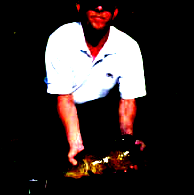

In [ ]:
numbers.rgb

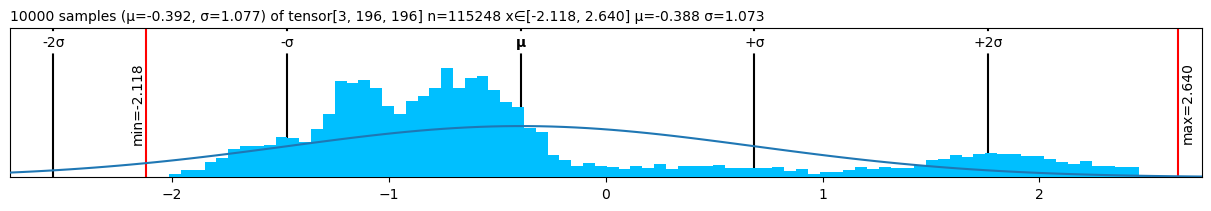

In [ ]:
numbers.plt

Better, huh?

In [ ]:
numbers[1,:6,1] # Still shows values if there are not too many.

tensor[6] x∈[-0.443, -0.197] μ=-0.311 σ=0.091 [-0.197, -0.232, -0.285, -0.373, -0.443, -0.338]

In [ ]:
spicy = numbers[0,:12,0].clone()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
spicy # Spicy stuff

tensor[2, 6] n=12 x∈[-3.541e+03, -4.054e-05] μ=-393.842 σ=1.180e+03 +Inf! -Inf! NaN!

In [ ]:
torch.zeros(10, 10) # A zero tensor - make it obvious

tensor[10, 10] n=100 all_zeros

In [ ]:
spicy.v # Verbose

tensor[2, 6] n=12 x∈[-3.541e+03, -4.054e-05] μ=-393.842 σ=1.180e+03 +Inf! -Inf! NaN!
tensor([[-3.5405e+03, -4.0543e-05,         inf,        -inf,         nan, -6.1093e-01],
        [-6.1093e-01, -5.9380e-01, -5.9380e-01, -5.4243e-01, -5.4243e-01, -5.4243e-01]])

In [ ]:
spicy.p # The plain old way

tensor([[-3.5405e+03, -4.0543e-05,         inf,        -inf,         nan, -6.1093e-01],
        [-6.1093e-01, -5.9380e-01, -5.9380e-01, -5.4243e-01, -5.4243e-01, -5.4243e-01]])

## Named dimensions

In [ ]:
named_numbers = numbers.rename("C", "H","W")
named_numbers

/home/xl0/mambaforge/envs/lovely-py31-torch25/lib/python3.10/site-packages/torch/_tensor.py:1420: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at ../c10/core/TensorImpl.h:1925.)
  return super().rename(names)


tensor[C=3, H=196, W=196] n=115248 (0.4Mb) x∈[-2.118, 2.640] μ=-0.388 σ=1.073

## Going `.deeper`

In [ ]:
numbers.deeper

tensor[3, 196, 196] n=115248 (0.4Mb) x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

In [ ]:
# You can go deeper if you need to
# And we can use `.deeper` with named dimensions.

named_numbers.deeper(2)

tensor[C=3, H=196, W=196] n=115248 (0.4Mb) x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[H=196, W=196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
    tensor[W=196] x∈[-1.912, 2.249] μ=-0.673 σ=0.522
    tensor[W=196] x∈[-1.861, 2.163] μ=-0.738 σ=0.418
    tensor[W=196] x∈[-1.758, 2.198] μ=-0.806 σ=0.397
    tensor[W=196] x∈[-1.656, 2.249] μ=-0.849 σ=0.369
    tensor[W=196] x∈[-1.673, 2.198] μ=-0.857 σ=0.357
    tensor[W=196] x∈[-1.656, 2.146] μ=-0.848 σ=0.372
    tensor[W=196] x∈[-1.433, 2.215] μ=-0.784 σ=0.397
    tensor[W=196] x∈[-1.279, 2.249] μ=-0.695 σ=0.486
    tensor[W=196] x∈[-1.364, 2.249] μ=-0.637 σ=0.539
    ...
  tensor[H=196, W=196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
    tensor[W=196] x∈[-1.861, 2.411] μ=-0.529 σ=0.556
    tensor[W=196] x∈[-1.826, 2.359] μ=-0.562 σ=0.473
    tensor[W=196] x∈[-1.756, 2.376] μ=-0.622 σ=0.458
    tensor[W=196] x∈[-1.633, 2.429] μ=-0.664 σ=0.430
    tensor[W=196] x∈[-1.651, 2.376] μ=-0.669 σ=0.399
    tensor[W=196] x∈[-1.633, 2.376] μ=-0

## Now in `.rgb` color

The important queston - is it our man?

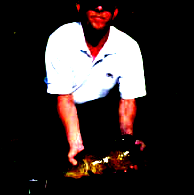

In [ ]:
numbers.rgb

_Maaaaybe?_ Looks like someone normalized him.

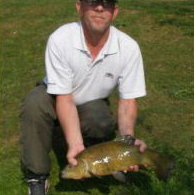

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean
             (0.229, 0.224, 0.225) )    # std

# numbers.rgb(in_stats, cl=True) # For channel-last input format
numbers.rgb(in_stats)

It's indeed our hero, the Tenchman!

## `.plt` the statistics

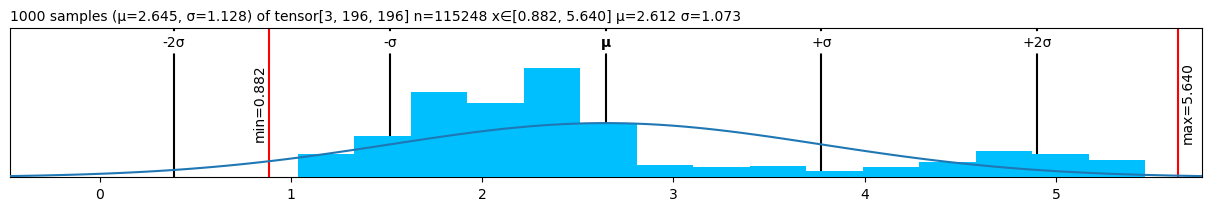

In [ ]:
(numbers+3).plt(center="mean", max_s=1000)

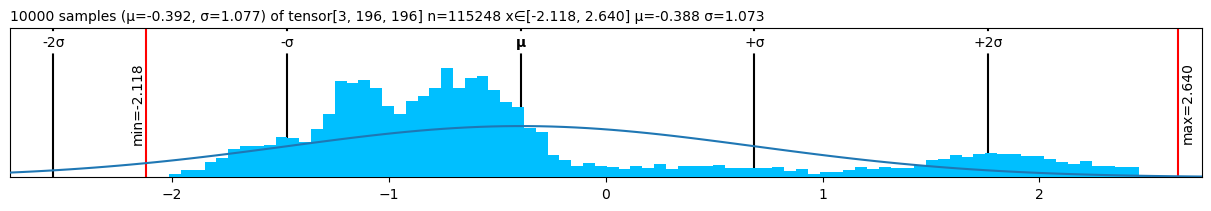

In [ ]:
(numbers).plt

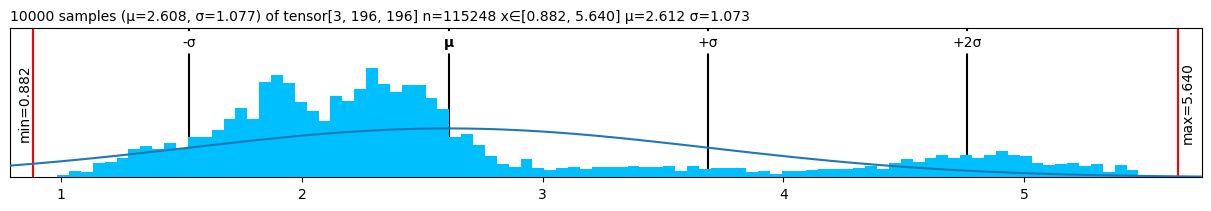

In [ ]:
(numbers+3).plt(center="range")

## See the `.chans`

In [ ]:
# .chans will map values betwen [-1,1] to colors.
# Make our values fit into that range to avoid clipping.
mean = torch.tensor(in_stats[0])[:,None,None]
std = torch.tensor(in_stats[1])[:,None,None]
numbers_01 = (numbers*std + mean)
numbers_01

tensor[3, 196, 196] n=115248 (0.4Mb) x∈[0., 1.000] μ=0.361 σ=0.248

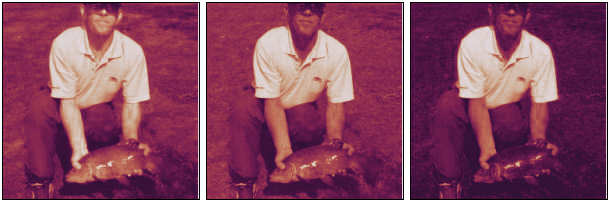

In [ ]:
numbers_01.chans

Let's try with a Convolutional Neural Network

In [ ]:
# |eval:false
from torchvision.models import vgg11

In [ ]:
# |eval:false
features: torch.nn.Sequential = vgg11().features

# I saved the first 5 layers in "features.pt"
_ = features.load_state_dict(torch.load("../features.pt", weights_only=True), strict=False)

In [ ]:
# |eval:false
# Activatons of the second max pool layer of VGG11
acts = (features[:6](numbers[None])[0]/2) # /2 to reduce clipping
acts

tensor[128, 49, 49] n=307328 (1.2Mb) x∈[0., 12.508] μ=0.367 σ=0.634 grad DivBackward0

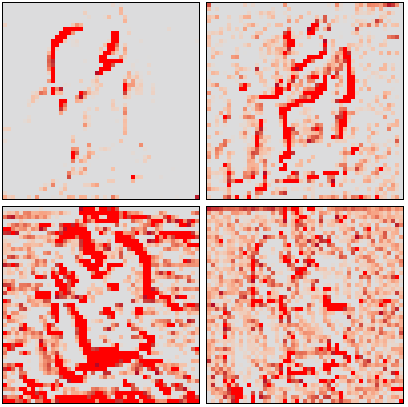

In [ ]:
# |eval:false
acts[:4].chans(cmap="coolwarm", scale=4)

## Grouping

In [ ]:
# Make 8 images with progressively higher brightness and stack them 2x2x2.
eight_images = (torch.stack([numbers]*8)
                    .add(torch.linspace(-3, 3, 8)[:,None,None,None])
                    .mul(torch.tensor(in_stats[1])[:,None,None])
                    .add(torch.tensor(in_stats[0])[:,None,None])
                    .clamp(0,1)
                    .view(2,2,2,3,196,196)
)
eight_images

tensor[2, 2, 2, 3, 196, 196] n=921984 (3.5Mb) x∈[0., 1.000] μ=0.411 σ=0.369

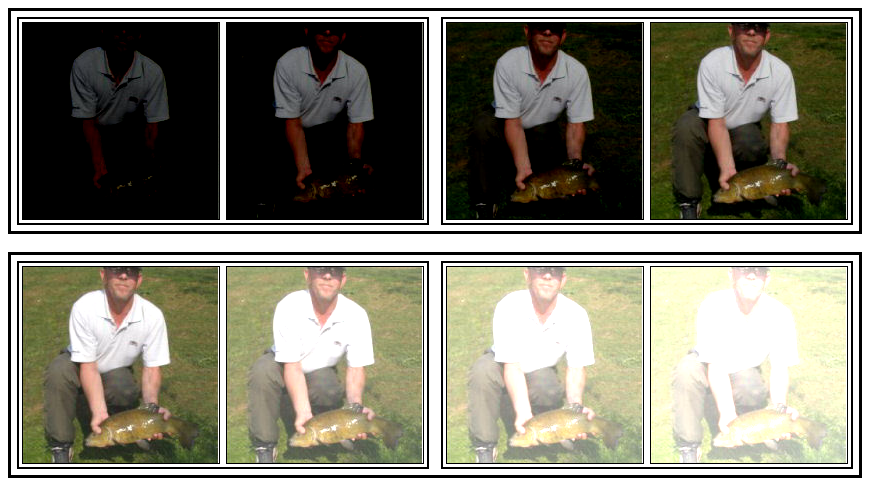

In [ ]:
eight_images.rgb

In [ ]:
# |eval:false
# Weights of the second conv layer of VGG11
features[3].weight

Parameter[128, 64, 3, 3] n=73728 (0.3Mb) x∈[-0.783, 0.776] μ=-0.004 σ=0.065 grad

I want +/- 2σ to fall in the range [-1..1]

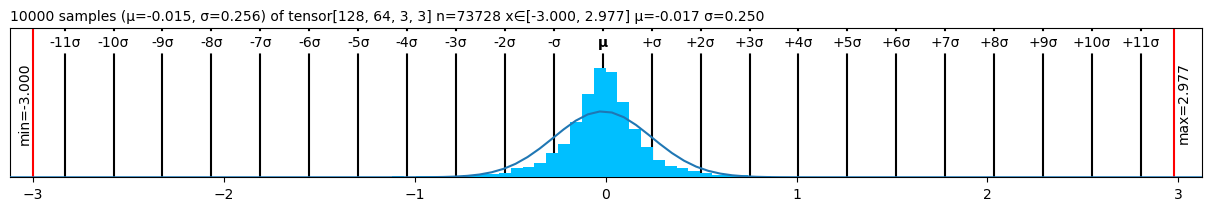

In [ ]:
# |eval:false
weights = features[3].weight.data
weights = weights / (2*2*weights.std()) # *2 because we want 2σ on both sides, so 4σ
# weights += weights.std() * 2
weights.plt

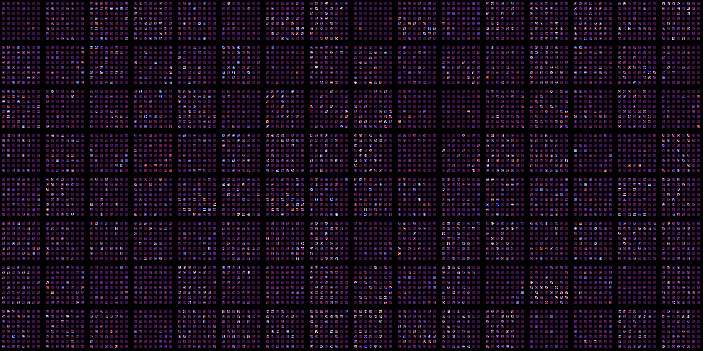

In [ ]:
# |eval:false
# Weights of the second conv layer (64ch -> 128ch) of VGG11,
# grouped per output channel.
weights.chans(frame_px=1, gutter_px=0)

It's a bit hard to see. Scale up 10x, but onyl show the first 4 filters.

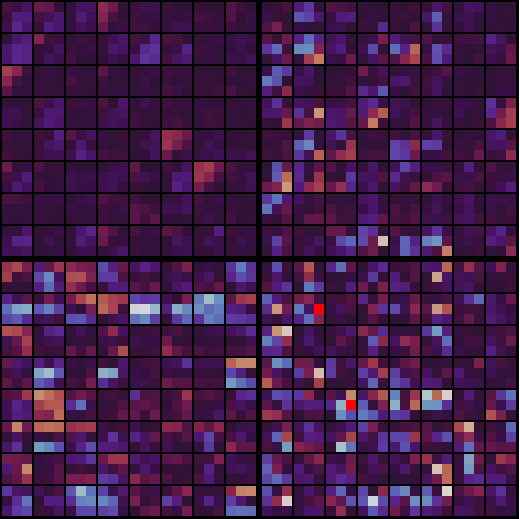

In [ ]:
# |eval:false
weights[:4].chans(frame_px=1, gutter_px=0, scale=10)

## Options | [Docs](https://xl0.github.io/lovely-tensors/utils.config.html)

In [ ]:
from lovely_tensors import set_config, config, lovely, get_config


In [ ]:
set_config(precision=1, sci_mode=True, color=False)
torch.tensor([1, 2, torch.nan])

tensor[3] μ=1.5e+00 σ=7.1e-01 NaN! [1.0e+00, 2.0e+00, nan]

In [ ]:
set_config(precision=None, sci_mode=None, color=None) # None -> Reset to defaults

In [ ]:
print(torch.tensor([1., 2]))
# Or with config context manager.
with config(sci_mode=True, precision=5):
    print(torch.tensor([1., 2]))

print(torch.tensor([1., 2]))

tensor[2] μ=1.500 σ=0.707 [1.000, 2.000]
tensor[2] μ=1.50000e+00 σ=7.07107e-01 [1.00000e+00, 2.00000e+00]
tensor[2] μ=1.500 σ=0.707 [1.000, 2.000]


## Without `.monkey_patch`

In [ ]:
lt.lovely(spicy)

tensor[2, 6] n=12 x∈[-3.541e+03, -4.054e-05] μ=-393.842 σ=1.180e+03 +Inf! -Inf! NaN!

In [ ]:
lt.lovely(spicy, verbose=True)

tensor[2, 6] n=12 x∈[-3.541e+03, -4.054e-05] μ=-393.842 σ=1.180e+03 +Inf! -Inf! NaN!
tensor([[-3.5405e+03, -4.0543e-05,         inf,        -inf,         nan, -6.1093e-01],
        [-6.1093e-01, -5.9380e-01, -5.9380e-01, -5.4243e-01, -5.4243e-01, -5.4243e-01]])

In [ ]:
lt.lovely(numbers, depth=1)

tensor[3, 196, 196] n=115248 (0.4Mb) x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

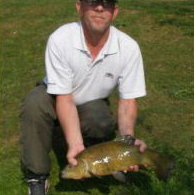

In [ ]:
lt.rgb(numbers, in_stats)

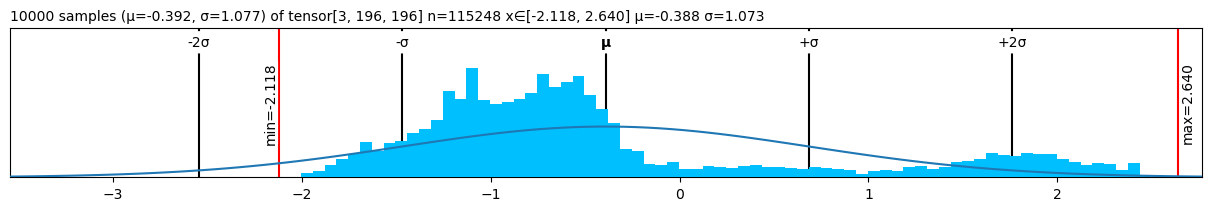

In [ ]:
lt.plot(numbers, center="mean")

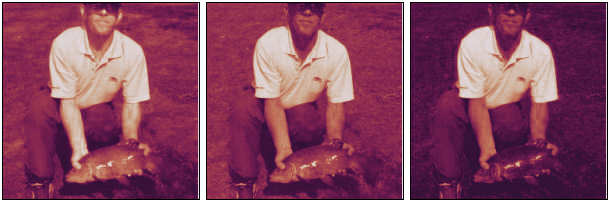

In [ ]:
lt.chans(numbers_01)

## Matplotlib integration | [Docs](https://xl0.github.io/lovely-tensors/matplotlib.html)

In [ ]:
# |hide

# Deterministic svg output
rcParams["svg.hashsalt"] = "1"

# No date, don't include matplotlib version
kwargs = {'metadata': {"Date": None, "Creator": "Matplotlib, https://matplotlib.org/" }}
%config InlineBackend.print_figure_kwargs = kwargs

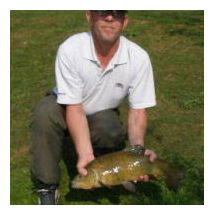

In [ ]:
numbers.rgb(in_stats).fig # matplotlib figure

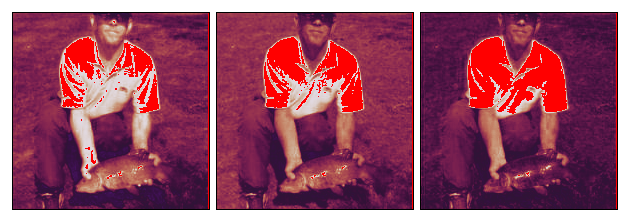

In [ ]:
(numbers*0.3+0.5).chans.fig # matplotlib figure

In [ ]:
numbers.plt.fig.savefig('pretty.svg') # Save it

In [ ]:
!file pretty.svg; rm pretty.svg

pretty.svg: SVG Scalable Vector Graphics image


### Add content to existing Axes

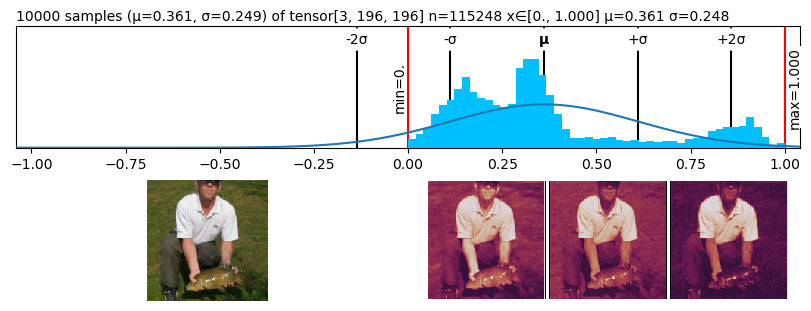

In [ ]:
fig = plt.figure(figsize=(8,3))
fig.set_constrained_layout(True)
gs = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1,1:])

ax2.set_axis_off()
ax3.set_axis_off()

numbers_01.plt(ax=ax1)
numbers_01.rgb(ax=ax2)
numbers_01.chans(ax=ax3);

## torch.compile()
Just works.

In [ ]:
def func(x):
    return x*2

if torch.__version__ >= "2.0":
    func = torch.compile(func)

func(torch.tensor([1,2,3]))

tensor[3] i64 x∈[2, 6] μ=4.000 σ=2.000 [2, 4, 6]

## Inport hook

Lovely tensors installes an import hook. Set `LOVELY_TENSORS=1`, and it will load automatically, no need to modify the code:
> Note: Don't set it globally, or all python scripts you run will import LT and PyTorch, which will slow things down.

```python
import torch

x = torch.randn(4, 16)
print(x)
```

```bash
LOVELY_TENSORS=1 python test.py
```
```
x: tensor[4, 16] n=64 x∈[-1.652, 1.813] μ=-0.069 σ=0.844
```

This is especially useful in combination with [Better Exceptions](https://github.com/Qix-/better-exceptions):

```python
import torch

x = torch.randn(4, 16)
print(f"x: {x}")

w = torch.randn(15, 8) 
y = torch.matmul(x, w) # Dimension mismatch
```

```bash
BETTER_EXCEPTIONS=1  LOVELY_TENSORS=1 python test.py 
```

```
x: tensor[4, 16] n=64 x∈[-1.834, 2.421] μ=0.103 σ=0.896
Traceback (most recent call last):
  File "/home/xl0/work/projects/lovely-tensors/test.py", line 7, in <module>
    y = torch.matmul(x, w)
        │            │  └ tensor[15, 8] n=120 x∈[-2.355, 2.165] μ=0.142 σ=0.989
        │            └ tensor[4, 16] n=64 x∈[-1.834, 2.421] μ=0.103 σ=0.896
        └ <module 'torch' from '/home/xl0/mambaforge/envs/torch25-py313/lib/python3.12/site-packages/torch/__init__.py'>
RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x16 and 15x8)
```